In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
amazon_data = ('amazon_cells_labelled.txt')
yelp_data = ('yelp_labelled.txt')
imdb_data = ('imdb_labelled.txt')

df = pd.read_table(amazon_data, header = None)
# Positive Review => 1
# Negative Review => 0
df.columns = ['Reviews', 'Rating']

In [30]:
# Do not run a second time
# Wants to find negative reviews
df['Rating'] = (df['Rating'] == 0)

In [32]:
df.head()

,Reviews,Rating,bad,worst,disappointed,disappointment,wasted,waste,do not,not,junk,average
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False


    # Bag of Words
    # Can also measure frequencies of words or length of words or punctuation marks

In [31]:
# some keywords only works better for certain data
## 'junk' -> better for amazon data
negative_key = ['bad', 'worst', 'disappointed', 'disappointment', 'wasted', 'waste', 'do not', 'not', 'junk', 'average']

#Find these keywords that represent negative reviews
for key in negative_key:
    df[str(key)] = df.Reviews.str.contains('' + str(key) + '', case = False)

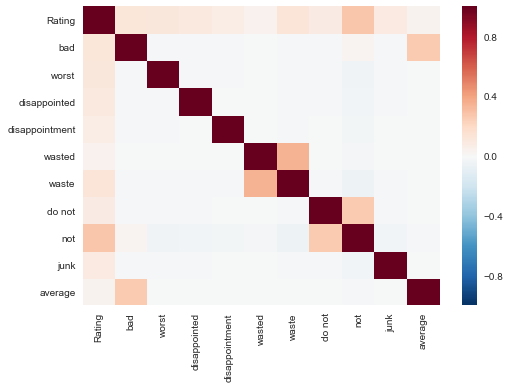

In [21]:
sns.heatmap(df.corr())

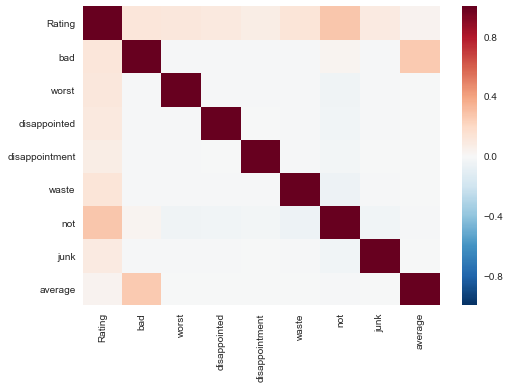

In [14]:
## DO NOT run a second time!!

# combine the varibles that are highly correlated
# 'do not' + 'not' 
df.loc[((df['do not'] == True) | (df['not'] == True) ), 'not'] = True
df = df.drop(['do not'], axis = 1)

# 'wasted' + 'waste'
df.loc[((df['wasted'] == True) | (df['waste'] == True)), 'waste'] = True
df = df.drop(['wasted'], axis = 1)

# 'bad' + 'average' 
#df.loc[((df['bad'] == True) | (df['average'] == True) ), 'bad'] = True
#df = df.drop(['average'], axis = 1)


# remove the unwanted variables from list
negative_key.remove('do not')
negative_key.remove('wasted')
#negative_key.remove('average')

# after combining the two highly correlated variableds
sns.heatmap(df.corr())

In [22]:
# set targeted variables and features
features = df[negative_key]
target = df['Rating']

In [23]:
features.head()

,bad,worst,disappointed,disappointment,wasted,waste,do not,not,junk,average
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [24]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
#bnb = MultinomialNB()    Since the Rating is binary, Bernoulli works better

# Fit our model to the data.
bnb.fit(features, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(features)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    features.shape[0],
    (target != y_pred).sum()
))
print('The mislabeled points proportion : {0:.4f}'.format((target != y_pred).sum() / features.shape[0]))

Number of mislabeled points out of a total 1000 points : 344
The mislabeled points proportion : 0.3440


    Features I have selected:
    * focused on the possible keywords of negative reviews

Mislabeled Points: 
* Amazon Data - 34.40
* Yelp Data - 36.40%
* Imdb Data - 36.10%